(2488, 3520)
(2488, 3520)
(2488, 3520)
(2488, 3520)
(2488, 3520)
(2488, 3520)
(2488, 3520)
(2488, 3520)
(2488, 3520)
(2488, 3520)
(2488, 3520)
(2488, 3520)
(2488, 3520)
(2488, 3520)
(2488, 3520)
(2488, 3520)
(2488, 3520)
(2488, 3520)
(2488, 3520)
(2488, 3520)
(2488, 3520)
(2488, 3520)
(2488, 3520)
(2488, 3520)


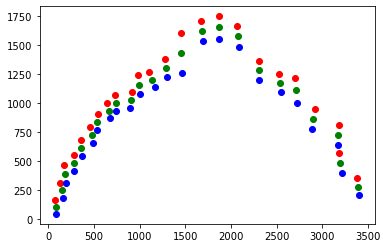

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math as ma
# import sympy as sp

i = 0
x_top = []
y_top = []
x_bottom = []
y_bottom = []
x_mean = []
y_mean = []
x_2 = []
x_unit = []


# cap = cv2.VideoCapture('frames/noisy/cv2-red-channel_noisy_0.png')
cap = cv2.VideoCapture('ball_video2.mp4')
# path = 'home/divyansh/vid_img'
while(cap.isOpened()):
    stop_top = False
    stop_bottom = False
    ret, frame = cap.read()
    if ret == False:
        break
    red_channel = frame[:,:,2]
    cons = 255
    red_channel = cons - red_channel
    print(np.shape(red_channel))

    #result = np.max(red_channel, axis=1)
    result = (np.where((red_channel>25) & (red_channel<30)))
    y_top.append(2488 - result[0][0])
    x_top.append(result[1][0])
    y_bottom.append(2488 - result[0][-1])
    x_bottom.append(result[1][-1])

           
            
        
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
# print(x_top)
# print(y_top)
# print(x_bottom)
# print(y_bottom)

[x_mean.append((g + h) / 2) for g, h in zip(x_top, x_bottom)]
[y_mean.append((g + h) / 2) for g, h in zip(y_top, y_bottom)]

# print('the mean is ', x_mean)
# print('the mean of y is', y_mean)


plt.scatter(x_top, y_top, c='r')
plt.scatter(x_bottom, y_bottom, c='b')
plt.scatter(x_mean, y_mean, c='g')
plt.show()
# print(x_top, x_bottom, y_top, y_bottom)


Least square curve fitting

In [2]:
[x_2.append(i**2) for i in x_mean]
[x_unit.append(1) for i in x_mean]

x_2 = np.matrix(x_2)
print('this is x square', x_2)
x_2 = x_2.transpose()
x_1 = np.matrix(x_mean)
x_1 = x_1.transpose()
x_unit = np.matrix(x_unit)
x_unit = x_unit.transpose()





this is x square [[6.00625000e+03 2.08802500e+04 3.33062500e+04 7.61760000e+04
  1.28881000e+05 2.23256250e+05 2.88369000e+05 4.38244000e+05
  5.40960250e+05 8.13604000e+05 9.83072250e+05 1.28482225e+06
  1.65894400e+06 2.11848025e+06 2.82408025e+06 3.48009025e+06
  4.30355025e+06 5.31994225e+06 6.44144400e+06 7.36308225e+06
  8.42160400e+06 1.00838002e+07 1.02240062e+07 1.15056640e+07]]


In [3]:
A = np.hstack((x_2, x_1, x_unit))
A = np.matrix(A)
A_t = A.transpose()

Y = np.matrix(y_mean)
Y = Y.transpose()

A_inv = A_t*A
A_inv = np.linalg.inv(A_inv)

X = (A_inv)*A_t*Y
a = X[0].round(7)
b = X[1].round(7)
c = X[2].round(7)
print(a[0,0], b, c)

-0.0004625 [[1.6459103]] [[37.4662236]]


In [4]:
x_gen = range(3520)
x_gen_m = np.matrix(x_gen)
x_gen_m = x_gen_m.transpose()
print(np.shape(x_gen_m))

(3520, 1)


In [5]:
x_gen_sq = []
[x_gen_sq.append(i**2) for i in x_gen]
x_gen_sq = np.matrix(x_gen_sq)
x_gen_sq = x_gen_sq.transpose()

print(np.shape(x_gen_sq))

(3520, 1)


In [6]:
y_gen = np.matrix(np.shape(x_gen_sq))
# x_gen_sq = np.array(x_gen_sq)
y_gen = a[0,0]*x_gen_sq + b[0,0]*x_gen_m + c[0,0]
print(y_gen[1000,0])

1220.8765236


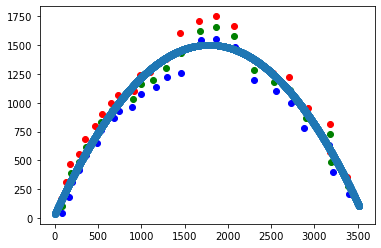

In [7]:
x_plot = x_gen_m.transpose()
x_plot = np.array(x_plot)
x_plot = x_plot.flatten()
x_l = x_plot.tolist()
# print(x_l)
y_plot = y_gen.transpose()
y_plot = np.array(y_plot)
y_plot = y_plot.flatten()
y_l = y_plot.tolist()
# print(y_l)
plt.scatter(x_top, y_top, c='r')
plt.scatter(x_bottom, y_bottom, c='b')
plt.scatter(x_mean, y_mean, c='g')
plt.scatter(x_l, y_l)
plt.show()